In [2]:
from parseq_analyze import run_parseq

## Setup Run
- Ceates a folder with the run name (run directory) in the output directory.
- Copies raw fastq files to a folder named raw_data in the run directory.
- Initializes a json file that will be updated throughout the analysis process to capture all important run information.
- Provides a histograms with stats on the number of sequences, and the average, min, max, and std of sequence length.
- Saves the histograms to /run_directory/fastq_length_histograms/raw_fastq.

Copied /home/ubuntu/notebooks/parSEQ_/raw_data/barcode05.fastq to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate05.fastq
Copied /home/ubuntu/notebooks/parSEQ_/raw_data/barcode06.fastq to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate06.fastq
Copied /home/ubuntu/notebooks/parSEQ_/raw_data/barcode07.fastq to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate07.fastq
json file for run run5_2023_11_05 created at /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/run5_2023_11_05.json


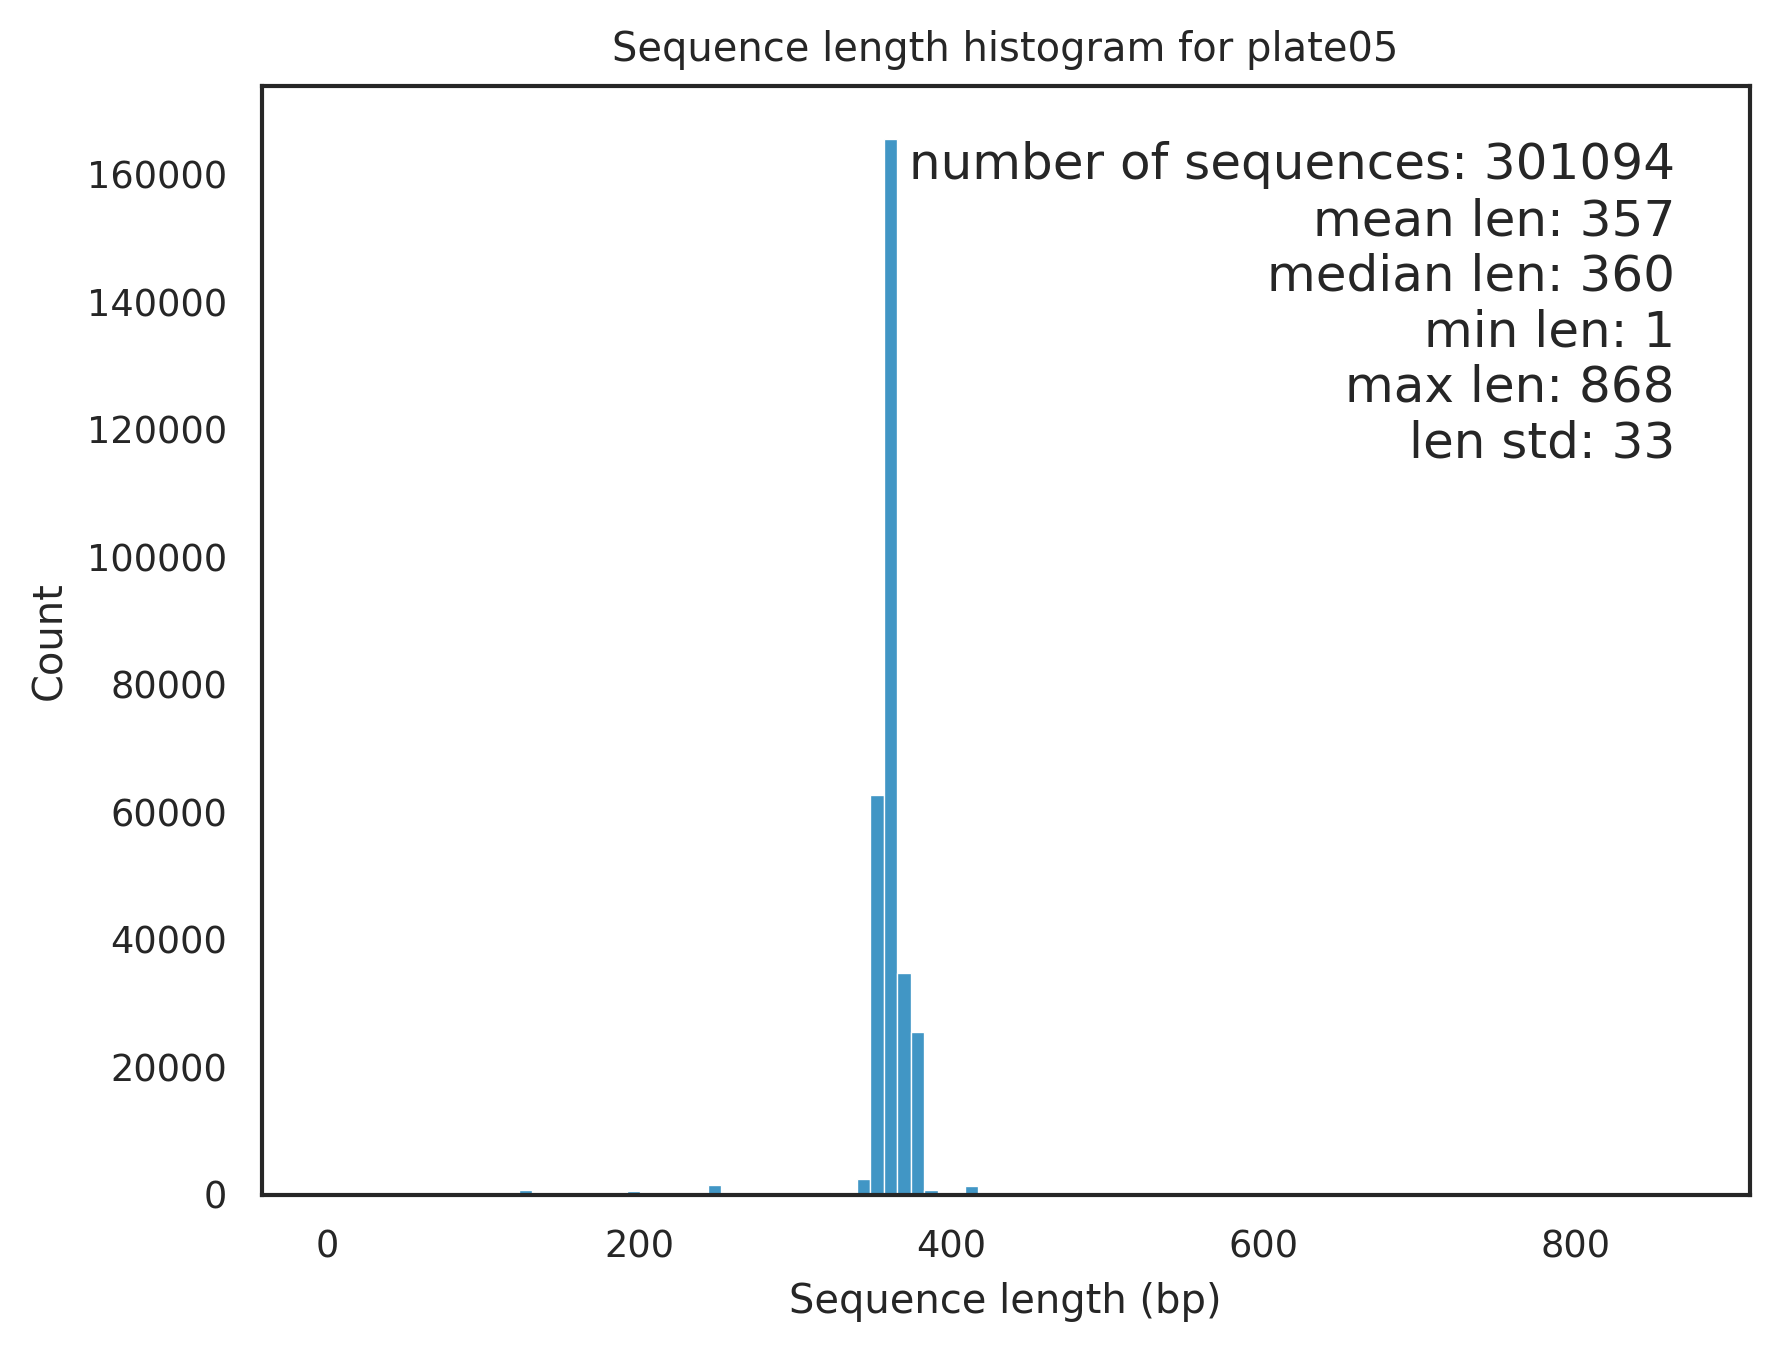

Sequence length histogram for plate05 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/raw_fastq
 Stats Dictionary for plate plate05:
num_sequences : 301094
mean_length : 356.9194105495294
median_length : 360.0
min_length : 1
max_length : 868
length_std : 32.73359443553748


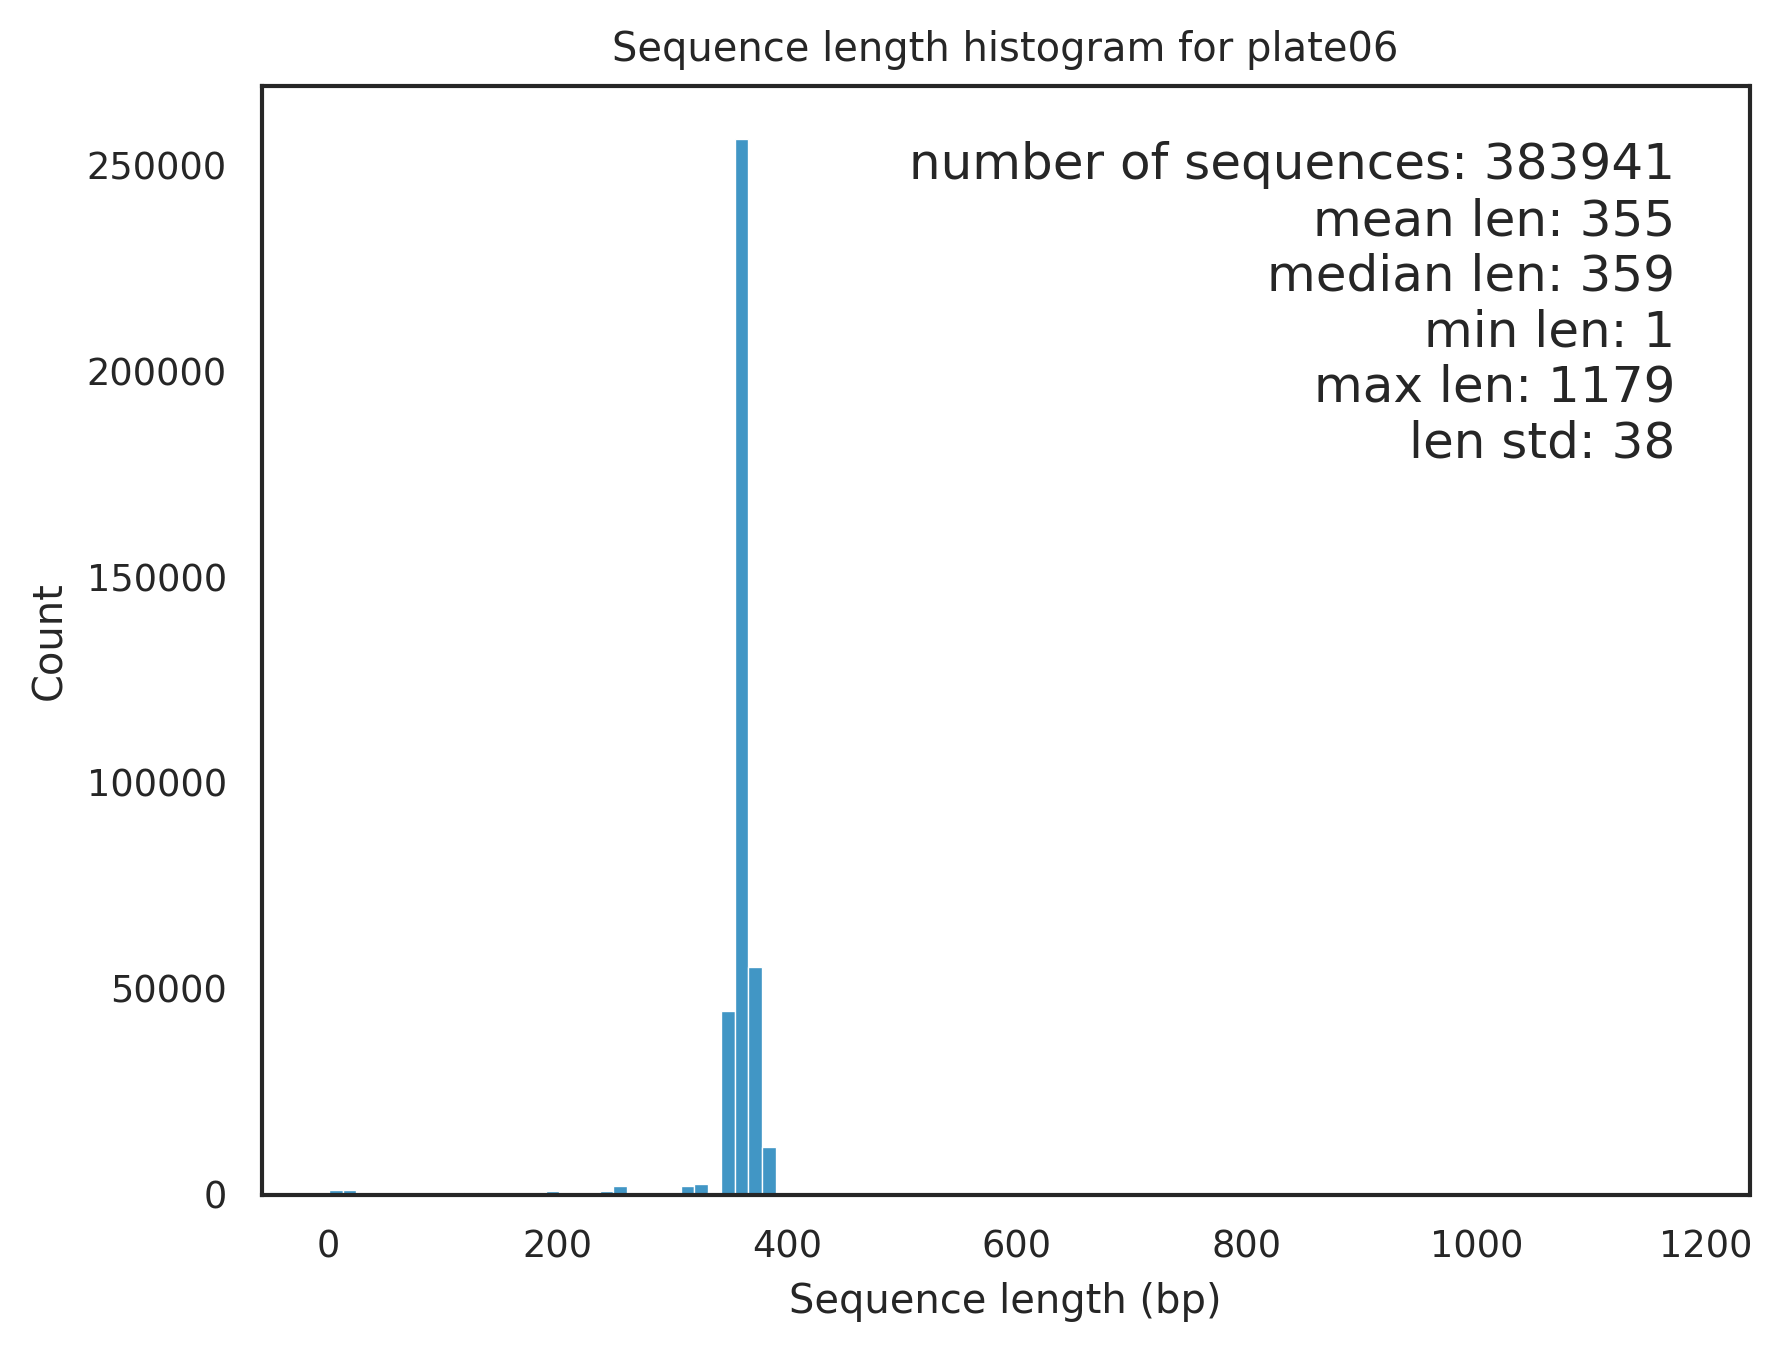

Sequence length histogram for plate06 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/raw_fastq
 Stats Dictionary for plate plate06:
num_sequences : 383941
mean_length : 354.81770636634275
median_length : 359.0
min_length : 1
max_length : 1179
length_std : 37.94395319017202


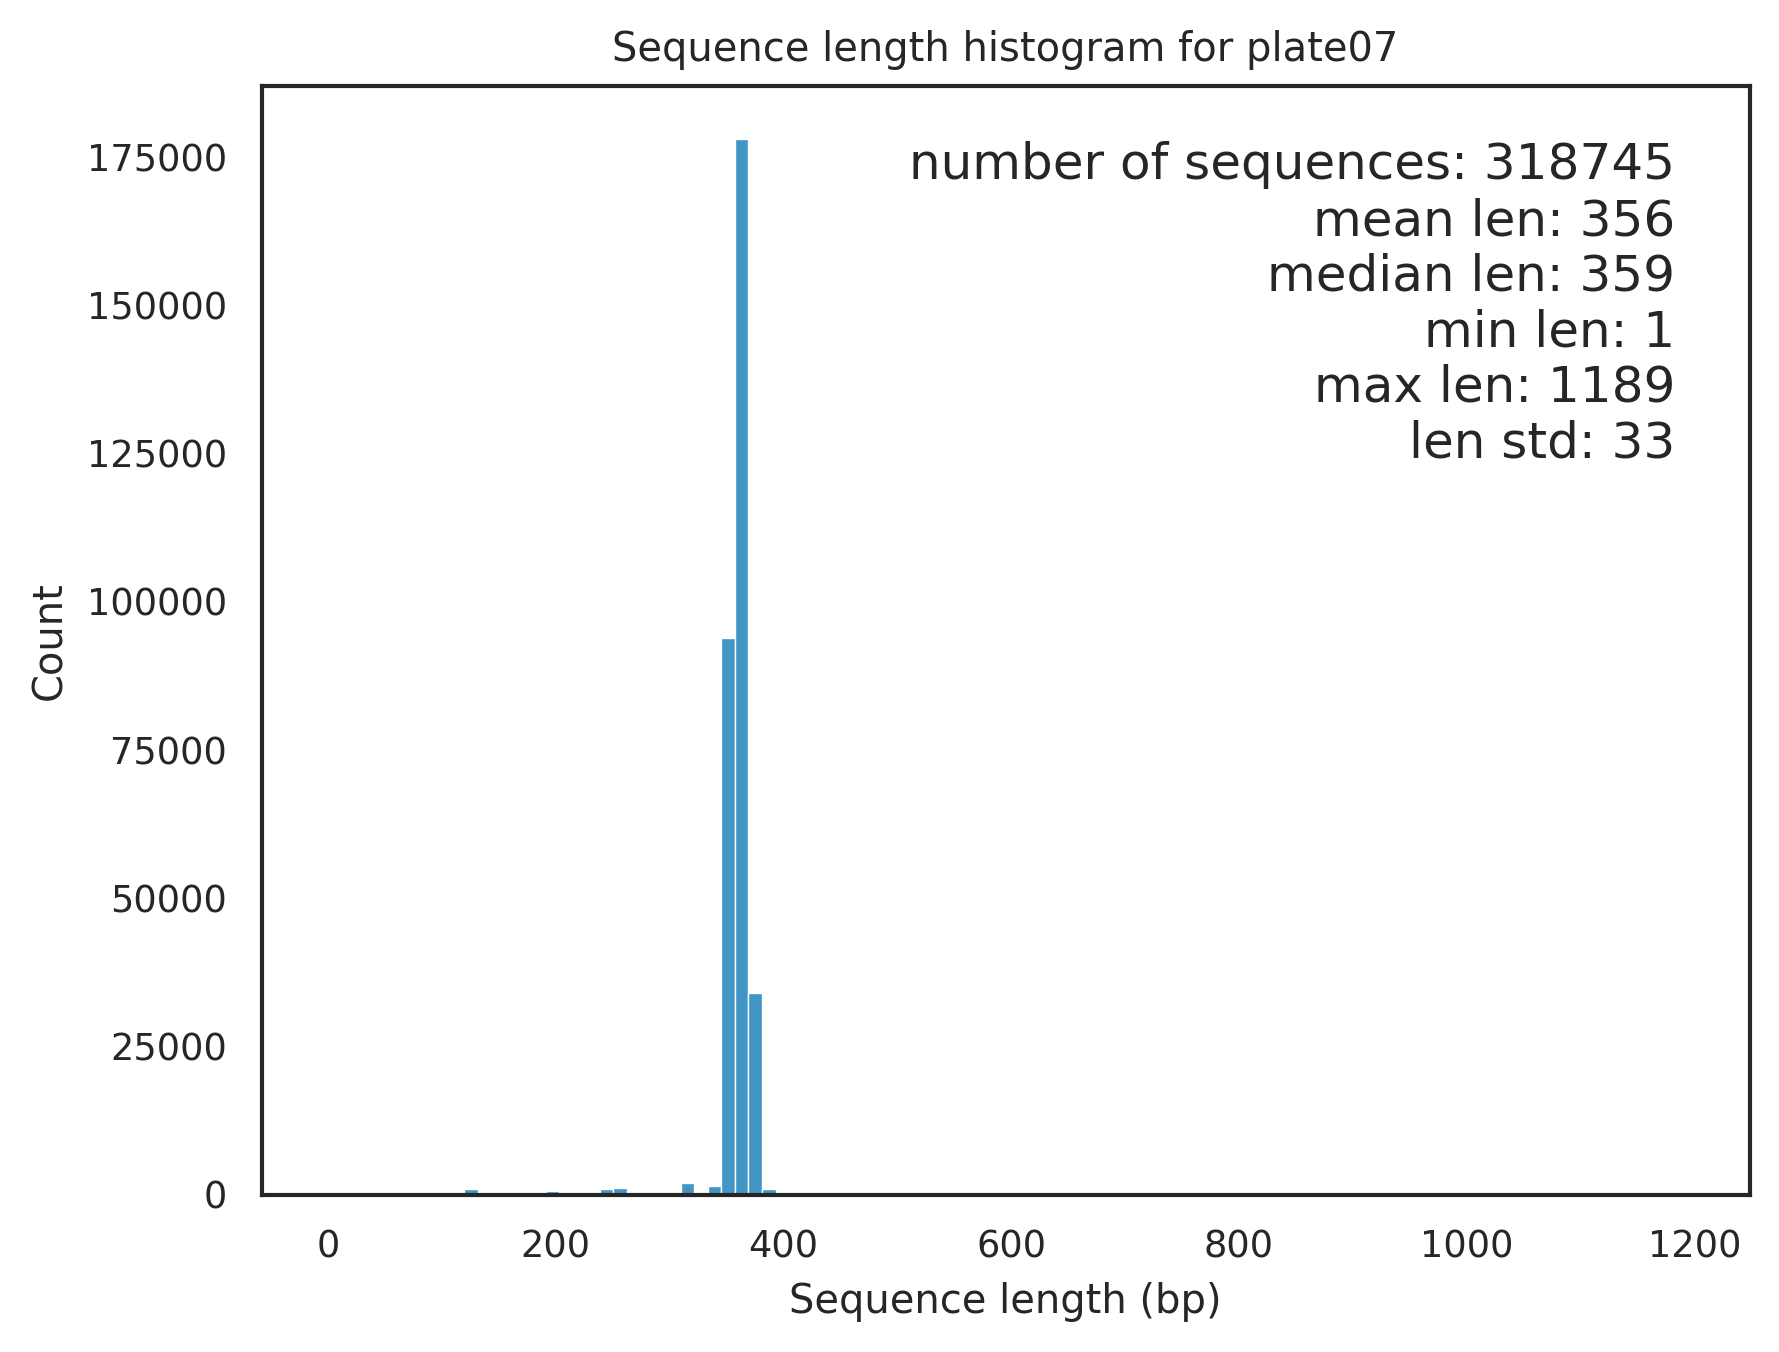

Sequence length histogram for plate07 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/raw_fastq
 Stats Dictionary for plate plate07:
num_sequences : 318745
mean_length : 355.9944595209337
median_length : 359.0
min_length : 1
max_length : 1189
length_std : 33.23729508375352
#########
raw fastq stats and length histogram completed.
Check json file for updated stats on plates and histogram paths.


In [2]:
## Setup Run Parameters

# A folder with the name of the run will be created in the output directory (path://output_directory_path/run_name)

run_name='run5_2023_11_05'

output_directory_path= '/home/ubuntu/notebooks/parseq_test_runs'

# fastq files for each plate.
# fastq files will be copied to /run_directory/raw_data and renamed to the plate name
plate_naming_scheme ={ 
    #platename : path to fastq file
    'plate05' : '/home/ubuntu/notebooks/parSEQ_/raw_data/barcode05.fastq',
    'plate06' : '/home/ubuntu/notebooks/parSEQ_/raw_data/barcode06.fastq',
    'plate07' : '/home/ubuntu/notebooks/parSEQ_/raw_data/barcode07.fastq',
       
}

# If you wish to run multiprocessing on the plates, set the number of cores here. If you wish to run on a single core, set to 1.
# Multiprocessing will run for the most intensive part of the analysis, which are the plate demultiplexing and the well sequence alignment
multiprocessing_cores = 4



run_json_file_path = run_parseq.set_up_run(run_name,output_directory_path,plate_naming_scheme,multiprocessing_cores)

## Data Filtering and QC
- Filters raw reads in fastq files for length and phred quality score.
- Outputs a filtered fastq file along with .html and .json quality description files per plate to  /run_directory/fastp_output/plate.
- Outputs length histogram along with length stats to /run_directory/fastq_length_histograms/post_fastp for each plate.
- Updates json file with relevant information.

In [3]:

### length filtering ###

# Length filtering is automatically taken as mean of the length distribution of th raw data +/- 2*standard deviation 
# If you wish to change this behavior, then please change the values in the following dictionary for the respective plate
#Use plate names, not original barocde names

#
length_filtering_dict={
    
    'plate05' :  {'min':  300, 'max':  420 },
    'plate06' :  {'min':  300, 'max':  420 },
    'plate07' :  {'min':  300, 'max':  420 },
    
}

# minimum quality score: qualified_quality_phred from fastp
# the quality value that a base is qualified. Default 10 means phred quality >=Q10 is qualified.
ngs_read_quality_filtering_dict={
    # Default is 10
    'plate05' :  {'min_quality_score' : 10 },
    'plate06' :  {'min_quality_score' : 10 },
    'plate07' :  {'min_quality_score' : 10 },
    
}



run_parseq.fastp_process(run_json_file_path,length_filtering_dict, ngs_read_quality_filtering_dict)

['fastp', '-A', '-i', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate05.fastq', '--length_required', '300', '--length_limit', '420', '-o', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.fastq', '-j', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.json', '-h', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.html', '-q', '10']


Read1 before filtering:
total reads: 301094
total bases: 107466293
Q20 bases: 90830756(84.5202%)
Q30 bases: 75097227(69.8798%)

Read1 after filtering:
total reads: 294221
total bases: 106290937
Q20 bases: 89864949(84.5462%)
Q30 bases: 74304752(69.9069%)

Filtering result:
reads passed filter: 294221
reads failed due to low quality: 148
reads failed due to too many N: 0
reads failed due to too short: 6605
reads failed due to too long: 120

Duplication rate (may be overestimated since this is SE data): 7.43972%

JSON report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.json
HTML report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.html

fastp -A -i /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate05.fastq --length_required 300 --length_limit 420 -o /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate05/plate05.fastq -j /home/ubuntu/notebooks/parseq_test_runs/run5_202

fastp completed for plate05
['fastp', '-A', '-i', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate06.fastq', '--length_required', '300', '--length_limit', '420', '-o', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.fastq', '-j', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.json', '-h', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.html', '-q', '10']


Read1 before filtering:
total reads: 383941
total bases: 136229065
Q20 bases: 111484372(81.836%)
Q30 bases: 82173433(60.32%)

Read1 after filtering:
total reads: 373751
total bases: 134628193
Q20 bases: 110265043(81.9034%)
Q30 bases: 81290379(60.3814%)

Filtering result:
reads passed filter: 373751
reads failed due to low quality: 395
reads failed due to too many N: 0
reads failed due to too short: 9613
reads failed due to too long: 182

Duplication rate (may be overestimated since this is SE data): 6.68424%

JSON report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.json
HTML report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.html

fastp -A -i /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate06.fastq --length_required 300 --length_limit 420 -o /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate06/plate06.fastq -j /home/ubuntu/notebooks/parseq_test_runs/run5_2023

fastp completed for plate06
['fastp', '-A', '-i', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate07.fastq', '--length_required', '300', '--length_limit', '420', '-o', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.fastq', '-j', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.json', '-h', '/home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.html', '-q', '10']


Read1 before filtering:
total reads: 318745
total bases: 113471454
Q20 bases: 93652792(82.5342%)
Q30 bases: 65523407(57.7444%)

Read1 after filtering:
total reads: 311197
total bases: 112183695
Q20 bases: 92631824(82.5716%)
Q30 bases: 64796725(57.7595%)

Filtering result:
reads passed filter: 311197
reads failed due to low quality: 187
reads failed due to too many N: 0
reads failed due to too short: 7242
reads failed due to too long: 119

Duplication rate (may be overestimated since this is SE data): 7.62965%

JSON report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.json
HTML report: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.html

fastp -A -i /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/raw_data/plate07.fastq --length_required 300 --length_limit 420 -o /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastp_output/plate07/plate07.fastq -j /home/ubuntu/notebooks/parseq_test_runs/run5_202

fastp completed for plate07


Sequence length histogram for plate05 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/post_fastp
Sequence length histogram for plate06 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/post_fastp
Sequence length histogram for plate07 saved to /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/fastq_length_histograms/post_fastp
#########
post fastp stats and length histogram completed.
Check json file for updated stats on plates and histogram paths.


## Read Demultiplexing
- Uses freebarcodes software to assign a barcode to each of the reads in each of the post_fastp fastq files.
    - Freebarcodes decoding uses barcoding mapping csv
    - Freebarcodes decoding does barcode search with error provided
    - Outputs text file for each plate with barcode assigned to each read in /run_directory/freebarcodes_output
- Separates reads from freebarcodes decoded file into respective well-level fasta files for each plate in /run_directory/demultiplexed/plate
    - Uses constant regions to get the fwd read of any reverse read, such that the fasta files contain fwd reads only.
    - Separation of freebarcodes decoded files into wells runs in parallel for the plates based on the multiprocessing_cores parameter provided.
- Provides plate level csv files for demultiplexed reads and number of reads per well.
- Updates json file with relevant information.

In [4]:
### Demultiplexing ###

#Demultiplexing decodes plates into wells using a barcode map. The barcode map is a csv file that maps the DNA barcode used in the parSEQ pipeline to the well name of a 384 well plate.


barcode_csv_path = '/home/ubuntu/notebooks/parSEQ_repo/barcode_map.csv'
barcode_search_error = 1


### Outputing forward reads only ###
# In order to output forward-read only demultiplexed well-level fasta files, we have to compare against a constant sequence that is present in the fwd reads. Note that for any reverse read, the forward read will be outputted in the fasta file.
# Best practice: 
# 1. Use a constant region that is 30+ bases long
# 2. Choose the sequence such that it is not at one of the extremities of the reads
# 3. Take the fwd read of the constant sequence and add it to the dictionary below

######################
## It is mandatory to add the fwd read of a constant sequence to the fwd_read_constant_sequence_dict below fore each plate to continue analysis##
######################

fwd_read_constant_sequence_dict = {
    
    'plate05' : 'GATCGGAAGAGCACACGTCTGAACTCCAGTCAC',
    'plate06' : 'GATCGGAAGAGCACACGTCTGAACTCCAGTCAC',
    'plate07' : 'GATCGGAAGAGCACACGTCTGAACTCCAGTCAC',
    
}


run_parseq.demultiplex_plates(run_json_file_path,barcode_csv_path,barcode_search_error,fwd_read_constant_sequence_dict)

Freebarcodes file created at /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/freebarcodes_output/freebarcodes9-1.txt
Freebarcodes decode completed for file plate05
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/freebarcodes_output


Freebarcodes decode completed for file plate06
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/freebarcodes_output
Freebarcodes decode completed for file plate07
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/freebarcodes_output
Separating freebarcodes decoded file into wells for plate05
Separating freebarcodes decoded file into wells for plate06
Separating freebarcodes decoded file into wells for plate07
Freebarcodes decoded file separated into wells for plate05
Output fasta folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/demultiplexed/plate05
 Output csv files: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/demultiplexed
Freebarcodes decoded file separated into wells for plate07
Output fasta folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/demultiplexed/plate07
 Output csv files: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/demultiplexed
Freebarcodes decoded file separated into wells for

## Alginment & Consensus
- Aligns every demultiplexed fasta file in  /run_directory/demultiplexed/plate and outputs aligned fasta file to /run_directory/aligned/plate.
    - Alignment algorithm options: mafft, muscle.
    - Alignment runs in parallel for the plates based on the multiprocessing_cores parameter provided.
- Calculates consensus sequence for every well of every plate with the provided consensus_threshold and ambiguous base.
    - Provides plate level csv files for raw consensus and stats /run_directory/consensus/raw_consensus.
    - Consensus runs in parallel for the plates based on the multiprocessing_cores parameter provided.
- Provides a run level csv file for raw consensus and stats under /run_directory.

Note that consensus sequences output at this step contain the well-level barcodes. They can be trimmed using the trimming and reconstruction oprion below.


In [3]:
### Aligning well reads and getting consensus###

# Alignment algorithms: 'mafft' or 'muscle'
# mafft is faster than muscle, but muscle is alightly more accurate
# Default is mafft
# mafft v7.49 is run in the --auto mode
# muscle v3.8.425 is run in the default mode with optimal gap opening and extension penalties for pooled amplicon sequencing data

alignment_algorithm = 'mafft'

# Consusensus threshold: The minimum fraction of reads that must have the same base at a given position in order for that base to be called in the consensus sequence
# Default is 0.6
consensus_threshold = 0.6
ambiguous_base = 'N' # The base that will be called if the consensus threshold is not met. Default is 'N'


run_parseq.align_wells_and_get_consensus (run_json_file_path, alignment_algorithm, consensus_threshold,ambiguous_base)

Aligning plate05 with mafft


Alignment completed for file plate05
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/aligned/plate05
Aligning plate06 with mafft
Alignment completed for file plate06
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/aligned/plate06
Aligning plate07 with mafft
Alignment completed for file plate07
Output folder: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/aligned/plate07
Creating raw consensus csv files for each plate
Raw consensus csv file created for plate05
Output file: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/raw_consensus/plate05_raw_consesus.csv
Raw consensus csv file created for plate07
Output file: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/raw_consensus/plate07_raw_consesus.csv
Raw consensus csv file created for plate06
Output file: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/raw_consensus/plate06_raw_consesus.csv


## Trimming & Reconstruction

Trimming and reconstruction is optional.
- Processes consensus csv files to trim 5' and 3' end based on the trim parameters provided. Trimming is optional
- Processes consensus csv files to add 5' and 3' end sequences based on the reconstruction parameters provided. Reconstruction is optional.
- Provides plate level trimmed & reconstructed consensus and stats under /run_directory/consensus/trimmed_reconstructed_consensus.
- Provides run level csv file for trimmed & reconstructed consensus and stats under /run_directory.



In [4]:
##### Trimming, Reconstruction of Consensus Sequences #####

### Trimming parameters ###
# If you wish to trim the reads, then add the trim parameters for every plate below
# Trimming will occur to the left of the 5' end trim and the right of the 3' end trim (reading in the 5' -> 3' direction of fwd read)
# If you wish to trim only one end, then leave the other end empty
# Trimming would work best if the sequences upon which the trimming is performed are relatively long (25 bases plus).
# Trimming is optional. If you do not wish to trim, then leave the trim_dictionary empty

trim_dictionary = {
    
    #both of these sequences should be given in the 5' to 3' direction of the forward read
    
   'plate05' : {'five_prime':'CTCGGAGATGTACTAAGAGAGACCCGTT', 'three_prime':'TGAAAGGTCTCTCTTAGTAGACATCCTCGC'},
   'plate06' : {'five_prime':'CTCGGAGATGTACTAAGAGAGACCCGTT', 'three_prime':'TGAAAGGTCTCTCTTAGTAGACATCCTCGC'},
   'plate07' : {'five_prime':'CTCGGAGATGTACTAAGAGAGACCCGTT', 'three_prime':'TGAAAGGTCTCTCTTAGTAGACATCCTCGC'},
    
    
}


### Sequence Reconstruction Parameters###
# If you wish to add 5' and 3' ends to your sequences add these 5' and 3' sequences below
# You can add both 5' and 3' ends or just one of them
# Reconstruction will run after trimming for the plates with the trimming parameters. 
# For plates without trimming parameters, reconstruction will run independently
# If you do not wish to reconstruct, then leave the reconstruct_dictionary empty

reconstruct_dictionary = {
    
'plate05' : {'five_prime': 'ACAAAAAAAAAAAAA', 'three_prime': ''  }, 
'plate06' : {'five_prime': 'ACAAAAAAAAAAAAA',  'three_prime': 'TTTTTTTT' },
             
    
}

run_parseq.trim_and_reconstruct(run_json_file_path,trim_dictionary,reconstruct_dictionary)

Trimming and reconstruction of consensus sequences completed for /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/trimmed_reconstructed_consensus/plate05_trimmed_reconstructed_consensus.csv
Output csv file: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/trimmed_reconstructed_consensus/plate05_trimmed_reconstructed_consensus.csv
Trimming and reconstruction of consensus sequences completed for /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/trimmed_reconstructed_consensus/plate06_trimmed_reconstructed_consensus.csv
Output csv file: /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/trimmed_reconstructed_consensus/plate06_trimmed_reconstructed_consensus.csv
Trimming and reconstruction of consensus sequences completed for /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/consensus/trimmed_reconstructed_consensus/plate07_trimmed_reconstructed_consensus.csv
Output csv file: /home/ubuntu/notebooks/parseq_test_runs/run5

## Results Visualization

- Creates visualizations based on the consensus sequences.
- Visualizations are based can based on raw consensus results or trimmed & reconstructed consensus results.
- Creates both plate-level and run-level visualizations
- Visualizations are intended to give a holistic view of the parSEQ run performance.

In [5]:
#### Result Visualization #####

## For each plate, the following results will be generated:
# Heat map of the number of reads in every well. Empty wells will appear as empty squares
# Heat map of the number of ambiguous reads in every well. Empty wells will appear as empty squares 
# Heat map of the average read length in every well. Empty wells will appear as empty squares 

# Histogram of the number of reads per well for each plate
# Histogram of the number of ambiguous reads per well for each plate 
# Histogram of the read length for each plate 

## On the run level, the following results will be generated:
# bar chart of the average number of reads per plate
# bar chart of the average read length per plate
# bar chart of the average number of ambiguous reads per plate
# heatmap of the average number of reads per well per plate
# heatmap of the average number of ambiguous reads per well per plate
# heatmap of the average read length per well per plate

# You can run the visualization on:
# 1. The raw consensus sequences by setting raw_consensus_visualizations = True
# 2. The trimmed and reconstructed sequences by setting trimmed_reconstructed_visualizations = True
# If you wish to run both, then set both to True

# Note:
# 1. raw consensus sequence visualizations will only be generated if the consensus sequences have been generated
# 2. trimmed and reconstructed visualizations will only be generated if the trimmed and reconstructed sequences have been generated

raw_consensus_visualizations = True
trimmed_reconstructed_visualizations = True

run_parseq.create_visualizations(run_json_file_path,raw_consensus_visualizations,trimmed_reconstructed_visualizations)

Run level visualizations for raw consensus sequences created.
Output directory:  /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/visualizations/raw_consensus_visualizations
Plate level visualizations for raw consensus sequences created.
Output directory:  /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/visualizations/raw_consensus_visualizations
Run level visualizations for trimmed reconstructed consensus sequences created.
Output directory:  /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/visualizations/trimmed_recon_consensus_visualizations
Plate level visualizations for trimmed reconstructed consensus sequences created.
Output directory:  /home/ubuntu/notebooks/parseq_test_runs/run5_2023_11_05/visualizations/trimmed_recon_consensus_visualizations
